Preceptron theories : https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975

In [665]:
import sklearn.datasets
import numpy as np

In [666]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [667]:
X = breast_cancer.data
Y = breast_cancer.target

In [668]:
print(X)
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [669]:
print(X.shape,Y.shape)

(569, 30) (569,)


In [670]:
import pandas as pd

In [671]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)  #(row,column)

In [672]:
data['class']=breast_cancer.target #output

In [673]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [674]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [675]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [676]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [677]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [678]:
from sklearn.model_selection import train_test_split

In [679]:
X = data.drop('class', axis = 1) #deleting the class column that we created
Y = data['class']

In [680]:
type(X)

pandas.core.frame.DataFrame

In [681]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y)  #stratify - to maintain split ratio equally

In [682]:
print(Y.mean(), Y_train.mean(), Y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


In [683]:
print(X.mean(), X_train.mean(), X_test.mean())

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

Note : Up to this same as MP_Neuron model 

For Preceptron model :

$y = 1, \mbox{if} \sum_i w_i x_i >= b$

$y = 0, \mbox{otherwise}$

Note : While we are running several times accuracy is inconsistent, so we introduce epochs.

Note : Even we introduced epochs, but the accuracy is also keeps oscillating for different value of Epochs ,so we have to checkpoint the higher accuracy

Note : After epochs, We have to introduce learining rate (lr) to smoothen or changing the time interval of changing the weight . This can be done by Multiplying lr .

In [684]:
class Perceptron:
    def __init__(self):
        self.w = None  #W- weights (in array)
        self.b = None #b - in scalar
        
    def model(self, x):
        return 1 if (np.dot(self.w, x) >= self.b) else 0 #evaluating the condition
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y, epochs = 1, lr = 1): #here there is a learning algorithm instead of brute force
            #lr initial value is set to 1                          
            #Epochs is used to get the onsistent accuracy and the epoch initial value is set to 1
            self.w = np.ones(X.shape[1]) #assuming weights and 1 represents selecting columns
            self.b = 0 #staring from 0
            
            accuracy = {}
            max_accuracy = 0
            
            wt_matrix = []
            
            for i in range(epochs):
                #Learning algorithm
                for x,y in zip(X, Y):
                    Y_pred = self.model(x)
                    if y == 1 and Y_pred == 0:
                        self.w = self.w + lr * x
                        self.b = self.b + lr * 1
                    elif y == 0 and Y_pred == 1:
                        self.w = self.w - lr * x
                        self.b = self.b - lr * 1
                    
                wt_matrix.append(self.w)
                
                accuracy[i] = accuracy_score(self.predict(X), Y) #Calculating the accuracy between training data for plotting
                if (accuracy[i] > max_accuracy):      #To get Maximum Accuracy
                    max_accuracy = accuracy[i]
                    chkptw = self.w  #checkpoint to store the weightage and b for higher accuracy
                    chkptb = self.b
            self.w = chkptw
            self.b = chkptb
            
                       
            print(max_accuracy)
            
            plt.plot(accuracy.values()) #train accuracy
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.ylim([0, 1]) #Just for the visibility of the change 
            plt.show()
            
            return np.array(wt_matrix)

Note : Perceptron model accepts real values so we can use the original standardised data as input

In [685]:
Perceptron = Perceptron()

In [686]:
#converting DataFame in to numpy Arrays
X_train = X_train.values
X_test = X_test.values

0.921875


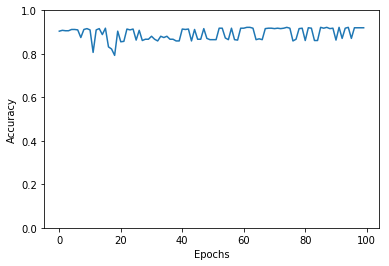

In [687]:
wt_matrix = Perceptron.fit(X_train, Y_train, 100, 1) #for 100 epochs

0.921875


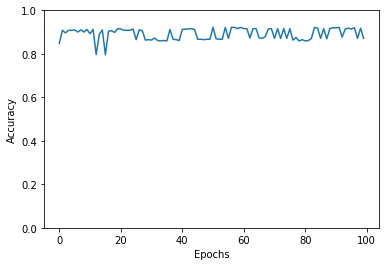

In [688]:
wt_matrix = Perceptron.fit(X_train, Y_train, 100, 0.001) #for 100 epochs and lr = 0.001

Note : with out learning rate , the accuracy starts with some lower accuracy than the usage of learning rate - i.e. Tuning of hyper parameter

In [689]:
import matplotlib.pyplot as plt

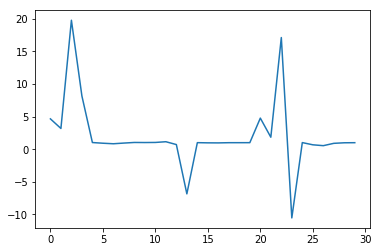

In [690]:
plt.plot(Perceptron.w)
plt.show()

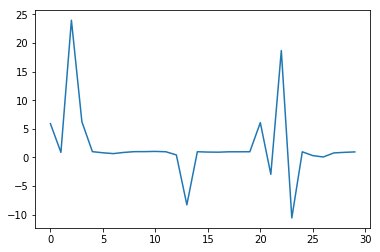

In [691]:
plt.plot(wt_matrix[-1,:])
plt.show()

In [692]:
from sklearn.metrics import accuracy_score

To calculate accuracy :

In [693]:
#For training data 
Y_pred_train = Perceptron.predict(X_train)
print(accuracy_score(Y_pred_train, Y_train))

0.921875


In [694]:
#For test data 
Y_pred_test = Perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, Y_test))

0.9298245614035088


Note : Extra - just animating how the weights are changed . Just for reference

link : http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

In [695]:
%matplotlib inline

In [696]:
from matplotlib import animation, rc
from IPython.display import HTML

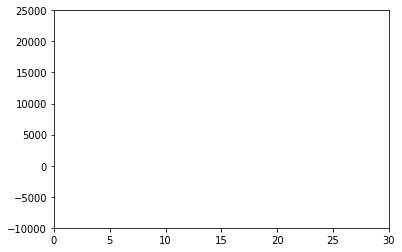

In [697]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-10000, 25000))

line, = ax.plot([], [], lw=2)

In [698]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i, :]
    line.set_data(x, y)
    return (line,)

In [699]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=20, blit=True)

Note : To run this , you have to refer how ho setup for ffmpeg .
    
reference link : https://stackoverflow.com/questions/13316397/matplotlib-animation-no-moviewriters-available

In [700]:
# HTML(anim.to_html5_video())